# Implement K Means clustering algorithm

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(URL, sep= ',', header=None)
iris.columns=["Sepal Length","Sepal Width","Petal Length","Petal Width","Class"]

In [3]:
data_features = iris.drop(["Class"], axis=1) 
data_class = iris[["Class"]]
data_features= data_features.as_matrix()
data_class =data_class.as_matrix()
np.shape(data_features)

(150, 4)

Vusialization of Iris dataset

In [4]:
# iris = datasets.load_iris()
# iris.columns=["Sepal Length","Sepal Width","Petal Length","Petal Width","Class"]
# data_features = iris.data
# data_class = iris.target

In [5]:
Irissetosa = iris[data_class == 'Iris-setosa']
Irisversicolor=iris[data_class == 'Iris-versicolor']
Irisvirginica= iris[data_class == 'Iris-virginica']

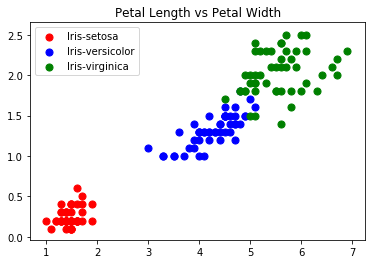

In [6]:
# Start with a plot figure of size 12 units wide
# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])
#Draw a Scatter plot for Sepal Length vs Sepal Width
plt.scatter(Irissetosa['Petal Length'], Irissetosa['Petal Width'], s=50, c='red',label = "Iris-setosa")
plt.scatter(Irisversicolor['Petal Length'], Irisversicolor['Petal Width'], s=50, c='blue',label = "Iris-versicolor")
plt.scatter(Irisvirginica['Petal Length'], Irisvirginica['Petal Width'], s=50, c='green',label = "Iris-virginica")
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.show()

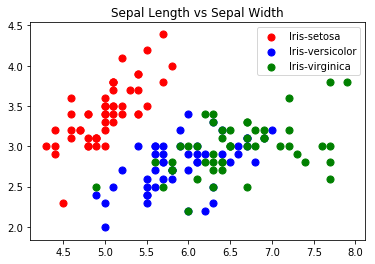

In [7]:
plt.scatter(Irissetosa['Sepal Length'], Irissetosa['Sepal Width'], s=50, c='red',label = "Iris-setosa")
plt.scatter(Irisversicolor['Sepal Length'], Irisversicolor['Sepal Width'], s=50, c='blue',label = "Iris-versicolor")
plt.scatter(Irisvirginica['Sepal Length'], Irisvirginica['Sepal Width'], s=50, c='green',label = "Iris-virginica")
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

We can clearly see the grouping in the plots with the red dots, which correspond to species Setosa. The green and blue dots are not so clearly separable.

In [8]:
np.shape(data_features)

(150, 4)

In [9]:
from math import sqrt, floor

def initialize(ds, k):

    # Number of attributes in dataset
    n = np.shape(ds)[1]
    
    # The centroids
    centroids = np.mat(np.zeros((k,n)))

    # Create random centroids (get min, max attribute values, randomize in that range)
    for j in range(n):
        min_j = min(ds[:,j])
        range_j = float(max(ds[:,j]) - min_j)
        centroids[:,j] = min_j + range_j * np.random.rand(k, 1)

    # Return centroids as numpy array
    return centroids

In [10]:
import scipy.spatial.distance as metric

def euclidean_dist(A, B):
    return metric.euclidean(A, B)

In [11]:
import numpy as np

def k_mean_cluster(ds, k):

    # Number of rows in dataset
    m = np.shape(ds)[0]

    # Hold the instance cluster assignments
    cluster_assignments = np.mat(np.zeros((m, 2)))

    # Initialize centroids
    cents = initialize(ds, k)
    
    # Preserve original centroids
    cents_orig = cents.copy()
    
    changed = True
    num_iter = 0

    # Loop until no changes to cluster assignments
    while changed:

        changed = False

        # For every instance (row in dataset)
        for i in range(m):

            # Track minimum distance, and vector index of associated cluster
            min_dist = np.inf
            min_index = -1

            # Calculate distances
            for j in range(k):

                dist_ji = euclidean_dist(cents[j,:], ds[i,:])
                if dist_ji < min_dist:
                    min_dist = dist_ji
                    min_index = j

            # Check if cluster assignment of instance has changed
            if cluster_assignments[i, 0] != min_index: 
                changed = True

            # Assign instance to appropriate cluster
            cluster_assignments[i, :] = min_index, min_dist**2

        # Update centroid location
        for cent in range(k):
            points = ds[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
            cents[cent,:] = np.mean(points, axis=0)

        # Count iterations
        num_iter += 1

    # Return important stuff when done
    return cents, cluster_assignments, num_iter, cents_orig

In [12]:
# Load dataset
# iris_data = datasets.load_iris()
# print(iris_data)

Apply K-Mean with K=3

In [83]:
# Perform k-means clustering
centroids, cluster_assignments, iters, original_centroids = k_mean_cluster(data_features, 3)
# Output results
print ('Number of iterations:', iters)
print ('\nFinal centroids:\n', centroids)
print ('\nOriginal centroids:\n', original_centroids)

Number of iterations: 6

Final centroids:
 [[6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]]

Original centroids:
 [[6.85955428 3.59563508 6.52825711 2.32679729]
 [6.87293225 4.00251871 4.11545934 1.08378626]
 [4.96027187 2.89786081 3.67778682 0.51229024]]


In [84]:
print ('\nCluster membership and errors:\n', cluster_assignments[:])


Cluster membership and errors:
 [[2.         0.021592  ]
 [2.         0.191992  ]
 [2.         0.169992  ]
 [2.         0.269192  ]
 [2.         0.039192  ]
 [2.         0.467592  ]
 [2.         0.172392  ]
 [2.         0.003592  ]
 [2.         0.641592  ]
 [2.         0.134392  ]
 [2.         0.237992  ]
 [2.         0.063192  ]
 [2.         0.241992  ]
 [2.         0.826392  ]
 [2.         1.040792  ]
 [2.         1.471592  ]
 [2.         0.438792  ]
 [2.         0.022792  ]
 [2.         0.686392  ]
 [2.         0.159192  ]
 [2.         0.213192  ]
 [2.         0.113992  ]
 [2.         0.415192  ]
 [2.         0.143992  ]
 [2.         0.234792  ]
 [2.         0.195192  ]
 [2.         0.043192  ]
 [2.         0.047592  ]
 [2.         0.043992  ]
 [2.         0.161592  ]
 [2.         0.163992  ]
 [2.         0.181192  ]
 [2.         0.524792  ]
 [2.         0.861592  ]
 [2.         0.134392  ]
 [2.         0.119192  ]
 [2.         0.279592  ]
 [2.         0.134392  ]
 [2.         0.57

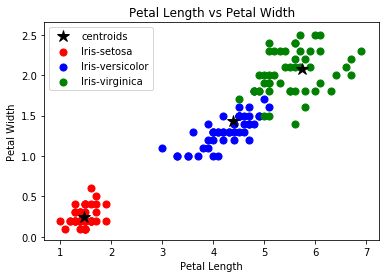

In [85]:
plt.scatter(Irissetosa['Petal Length'], Irissetosa['Petal Width'], s=50, c='red',label = "Iris-setosa")
plt.scatter(Irisversicolor['Petal Length'], Irisversicolor['Petal Width'], s=50, c='blue',label = "Iris-versicolor")
plt.scatter(Irisvirginica['Petal Length'], Irisvirginica['Petal Width'], s=50, c='green',label = "Iris-virginica")
plt.plot(centroids[0:,2], centroids[0:,3] , 'k*' , markersize= 12 , label= "centroids")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.show()

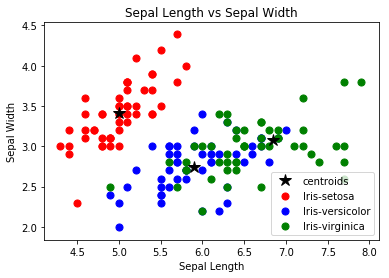

In [86]:
plt.scatter(Irissetosa['Sepal Length'], Irissetosa['Sepal Width'], s=50, c='red',label = "Iris-setosa")
plt.scatter(Irisversicolor['Sepal Length'], Irisversicolor['Sepal Width'], s=50, c='blue',label = "Iris-versicolor")
plt.scatter(Irisvirginica['Sepal Length'], Irisvirginica['Sepal Width'], s=50, c='green',label = "Iris-virginica")
plt.plot(centroids[0:,0], centroids[0:,1] , 'k*' , markersize= 12 , label= "centroids")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

In [87]:
def accuracy (clusters,classes):
    correct = 0
    for i in range(len(clusters)):
        if(clusters[i] == classes[i]): #comparing prediction with real data 
            correct +=1 #count number of correct predictions
    return correct/len(clusters) # number of correct predictions/ number of all predictions

In [88]:
classes = datasets.load_iris().target

In [89]:
Accuracy = accuracy( cluster_assignments[:,0], classes)

In [90]:
print("Accuracy: %" +str(Accuracy*100.0) )

Accuracy: %32.0


In [121]:
K = [2,3,4,5]
Accuracy_list = list()
iter_list = list()
for k in K:
    centroids_, cluster_assignments_, iters_, original_centroids_ = k_mean_cluster(data_features,k)
    Accuracy = accuracy( cluster_assignments_[:,0], classes)
    Accuracy_list.append(Accuracy)
    iter_list.append(iters)
Accuracy_list

[0.6466666666666666, 0.8866666666666667, 0.006666666666666667, 0.0]

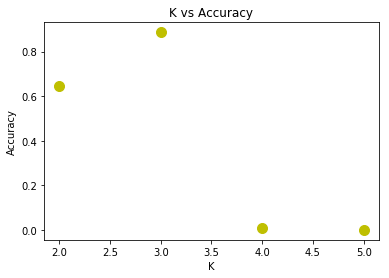

In [122]:
plt.plot(K, Accuracy_list , 'yo' , markersize= 10 )
plt.title('K vs Accuracy')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we saw in the graph of K vs Accuracy, when K=3 we have best accuracy then optimal value for k must be 3.

# Cluster news articles

In [123]:
from sklearn.datasets import load_files
from sklearn.datasets import load_svmlight_file
from time import time

Work only wth categories in order to run the code faster

In [226]:
#categories of 20newsgroup 
categories = [
    'comp.os.ms-windows.misc',
    'comp.sys.ibm.pc.hardware',
    'comp.sys.mac.hardware']

In [227]:
data_train = load_files("C:/20news/20news-bydate-train", categories = categories)
data_test = load_files("C:/20news/20news-bydate-test", categories = categories)

In [228]:
print("%d documents in trainset" % len(data_train.data))
print("%d categories in trainset" % len(data_train.target_names))

1759 documents in trainset
3 categories in trainset


In [229]:
print("%d documents in testset" % len(data_test.data))
print("%d categories in testset" % len(data_test.target_names))

1171 documents in testset
3 categories in testset


In [232]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(data_train)
print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % vectors.shape)

Extracting features from the training dataset using a sparse vectorizer
done in 0.003001s
n_samples: 5, n_features: 5


In [244]:
t0 = time()
centroids_prime, cluster_assignments_prime, iters_prime, original_centroids_prime = k_mean_cluster(vectors.todense(),3)
print("done in %fs" % (time() - t0))

done in 0.005003s


In [236]:
# Output results
print ('Number of iterations:', iters_prime)
print ('\nFinal centroids:\n', centroids_prime)
print ('\nOriginal centroids:\n', original_centroids_prime)

Number of iterations: 2

Final centroids:
 [[0.  1.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5]
 [0.5 0.  0.  0.5 0. ]]

Original centroids:
 [[0.85165767 0.67668737 0.40060072 0.01311963 0.38953903]
 [0.39997599 0.32156209 0.97935984 0.20046661 0.95307356]
 [0.97566876 0.00645977 0.34258114 0.28785821 0.2606619 ]]


Apply kmean from sklearn and compar with my method

In [237]:
np.shape(categories)[0]

3

In [238]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=np.shape(categories)[0], init='k-means++', max_iter=100, n_init=1)
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(vectors)
print("done in %0.3fs" % (time() - t0))
print()

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
done in 0.203s



Evaluate the result

In [258]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(vectors[0,:].toarray()[0], km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(vectors[0,:].toarray()[0], km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(vectors[0,:].toarray()[0], km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(vectors[0,:].toarray()[0], km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(vectors, vectors[0,:].toarray()[0], sample_size=1000))
print()

Homogeneity: 1.000
Completeness: 0.527
V-measure: 0.690
Adjusted Rand-Index: 0.444
Silhouette Coefficient: 0.000

